In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn.preprocessing import label_binarize
import pickle
from MVDD.MVDD import MVDD
import MVDD.MVDD_Generator as mvGen

%matplotlib inline

plt.rc('font', size=12)
warnings.filterwarnings('ignore')

# Hemodynamics

In [2]:
#Load original dataframes
hemoData = pd.read_csv('Data/Preprocessed Data/ESCAPE_Hemo.csv', index_col='ID')
allScores = hemoData['Score']
death = hemoData['ScoreDeath']
rehosp = hemoData['ScoreRehosp']
readm = hemoData['ScoreReadmission']
hemoData

,Age,Gender,Race,EjF,RAP,PAS,PAD,PAMN,PCWP,CO,...,RAT,PPRatio,PAPi,SAPi,CPP,PRAPRat,Score,ScoreDeath,ScoreRehosp,ScoreReadmission
ID,,,,,,,,,,,,,,,,,,,,,
72,88.0,2.0,1.0,25.0,24.0,42.0,24.0,30.0,36.0,2.20,...,0.666667,0.266667,0.750000,0.777778,50.0,1.166667,4,4,4,3
72,88.0,2.0,1.0,25.0,18.0,42.0,24.0,30.0,24.0,3.10,...,0.750000,0.272727,1.000000,1.000000,50.0,1.333333,4,4,4,3
81,69.0,1.0,1.0,20.0,10.0,40.0,20.0,27.0,18.0,4.52,...,0.555556,0.242857,2.000000,0.944444,45.0,1.700000,5,5,5,4
81,69.0,1.0,1.0,20.0,12.0,35.0,15.0,25.0,17.0,4.65,...,0.705882,0.571429,1.666667,2.352941,45.0,3.333333,5,5,5,4
814,58.0,1.0,1.0,NaN,3.0,51.0,19.0,30.0,18.0,4.10,...,0.166667,0.566667,10.666667,1.888889,44.0,11.333333,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98508,57.0,1.0,98.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,37.0,NaN,3,2,1,5
99302,41.0,1.0,2.0,15.0,19.0,87.0,37.0,54.0,44.0,3.90,...,0.431818,0.642857,2.631579,1.227273,13.0,2.842105,2,3,3,1
99302,41.0,1.0,2.0,15.0,11.0,70.0,28.0,44.0,28.0,5.30,...,0.392857,1.088608,3.818182,3.071429,13.0,7.818182,2,3,3,1


In [3]:
# Preprocess and create training and testing sets
hemo = hemoData.drop('Score', axis=1)
hemo = hemo.drop('ScoreDeath', axis=1)
hemo = hemo.drop('ScoreRehosp', axis=1)
hemo = hemo.drop('ScoreReadmission', axis=1)
hemo = hemo.replace(np.inf, 0)
hemo = hemo.fillna(0)

xData = hemo
yData = allScores
xData.shape, yData.shape

((418, 28), (418,))

## All Scores Label

In [ ]:
yData = allScores
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_AllOutcomes', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Death Label


Total edges: 38 Nonterminal Edge 18
Must have more than 5 and less than 11 OR Edges
Best edge set: ['dashed', 'dashed', 'dashed', 'dashed', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed', 'solid', 'dashed', 'solid', 'solid']
Accuracy DT: 0.9047619047619048
Accuracy MVDD: 0.5238095238095238


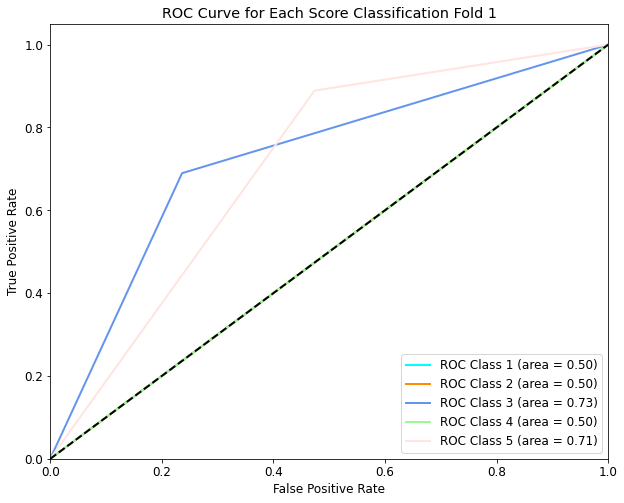


Total edges: 40 Nonterminal Edge 19
Must have more than 6 and less than 11 OR Edges


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-d5a02d113df3>", line 2, in <module>
    mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"],
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD_Generator.py", line 61, in generateTreeCrossValidation
    dt, mvdd = trainCrossValidation(xData, yData, dt, numFolds, classes, learningCriteria, showIndividualROC, modelName)
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD_Generator.py", line 101, in trainCrossValidation
    mvdd = getBestMVDD(dt, X_train, y_train, classes, learningCriteria)
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD_Generator.py", line 205, in getBestMVDD
    y_pred = mvdd.predictScoreSet(xData)
  File "/Users/josie/PycharmProjects/HemoPheno4HF/MVDD/MVDD.py", line 89, in pred

TypeError: object of type 'NoneType' has no len()

In [3]:
yData = death
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Death', numFolds=5, 
                                        showIndividualROC=True)

In [6]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

,Feature Importance
BPSYS,0.344992
Gender,0.325816
MAP,0.152324
CPI,0.111745
PAS,0.013640
PAPP,0.011770
PAPi,0.009529
Age,0.008241
HRTRT,0.007848
CI,0.007147


## Rehospitalization

In [ ]:
yData = rehosp
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Rehosp', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Readmission

In [ ]:
yData = readm
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='Hemo_Readmission', numFolds=5, 
                                        showIndividualROC=True)

In [ ]:
# Get Feature importance
featureDict = dict(zip(hemo.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

# All Data

In [3]:
#Load original dataframes
allData = pd.read_csv('Data/Preprocessed Data/ESCAPE_AllData.csv', index_col='ID')
allScores = allData['Score']
death = allData['ScoreDeath']
rehosp = allData['ScoreRehosp']
readm = allData['ScoreReadmission']
allData

,Age,Gender,Race,Wt,BMI,InitialHospDays,TotalHospDays,NYHA,MLHFS,AF,...,HR,PV,MAP,PP,PPP,PPRatio,Score,ScoreDeath,ScoreRehosp,ScoreReadmission
ID,,,,,,,,,,,,,,,,,,,,,
72.0,88.0,2.0,1.0,57.100000,26.424175,9.0,16.0,4.0,76.0,1.0,...,104.0,12.452563,139.333333,26.0,0.276596,0.250000,4,3,4,4
72.0,88.0,2.0,1.0,52.000000,24.064047,9.0,16.0,3.0,76.0,1.0,...,92.0,12.452563,126.000000,26.0,0.302326,0.282609,4,3,4,4
72.0,37.0,2.0,0.0,64.863709,0.000000,0.0,0.0,3.0,0.0,1.0,...,0.0,0.000000,118.000000,28.0,0.341463,0.411765,5,4,5,5
81.0,69.0,1.0,1.0,102.363636,32.307675,5.0,13.0,4.0,21.0,1.0,...,70.0,-3.346568,125.333333,32.0,0.363636,0.457143,4,3,4,4
81.0,69.0,1.0,1.0,100.454545,31.705134,5.0,13.0,2.0,21.0,1.0,...,72.0,-3.346568,105.666667,34.0,0.441558,0.472222,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99302.0,41.0,1.0,2.0,97.400000,40.541103,21.0,21.0,NaN,79.0,0.0,...,75.0,25.535155,130.000000,55.0,0.550000,0.733333,4,3,4,4
99912.0,46.0,1.0,1.0,78.636364,25.677180,2.0,2.0,4.0,89.0,0.0,...,67.0,-13.911732,174.666667,38.0,0.316667,0.567164,2,2,1,3
99912.0,46.0,1.0,1.0,78.200000,25.534694,2.0,2.0,3.0,89.0,0.0,...,60.0,-13.911732,140.666667,24.0,0.255319,0.400000,2,2,1,3


In [4]:
# Preprocess and create training and testing sets
alld = allData.drop('Score', axis=1)
alld = alld.drop('ScoreDeath', axis=1)
alld = alld.drop('ScoreRehosp', axis=1)
alld = alld.drop('ScoreReadmission', axis=1)
alld = alld.replace(np.inf, 0)
alld = alld.fillna(0)

xData = alld
yData = death
xData.shape, yData.shape

((889, 66), (889,))

## All Scores Label

In [ ]:
yData = allScores
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_AllOutcomes', numFolds=5, 
                                        showIndividualROC=True)


Total edges: 182 Nonterminal Edge 90
Must have more than 27 and less than 54 OR Edges


In [ ]:
# Get Feature importance
featureDict = dict(zip(alld.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Death Label

In [ ]:
yData = death
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_Death', numFolds=5, 
                                        showIndividualROC=True)


Total edges: 182 Nonterminal Edge 90
Must have more than 27 and less than 54 OR Edges


In [ ]:
# Get Feature importance
featureDict = dict(zip(alld.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Rehosp Label

In [ ]:
yData = rehosp
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_Rehosp', numFolds=5, 
                                        showIndividualROC=True)


Total edges: 182 Nonterminal Edge 90
Must have more than 27 and less than 54 OR Edges


In [ ]:
# Get Feature importance
featureDict = dict(zip(alld.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)

## Readmission Label

In [ ]:
yData = readm
mvdd = mvGen.generateTreeCrossValidation(xData=xData, yData=yData, classes=["1", "2", "3", "4", "5"], 
                                        learningCriteria='gini', maxLevels=None, minSamplesPerLeaf=1, 
                                        modelName='AllData_Readmission', numFolds=5, 
                                        showIndividualROC=True)


Total edges: 182 Nonterminal Edge 90
Must have more than 27 and less than 54 OR Edges


In [ ]:
# Get Feature importance
featureDict = dict(zip(alld.columns, mvdd.model.feature_importances_))
featureImp = pd.DataFrame.from_dict(featureDict, orient='index')
featureImp.rename(columns = {0:'Feature Importance'}, inplace = True)
featureImp = featureImp.sort_values(by=['Feature Importance'], ascending=False)
featureImp.head(10)